# Introduction

This is a dataset that I found on Kaggle. It documents various weather data across a 10 year span in various cities across Australia. The goal with this data is to build models to predict if there will be rain tomorrow. The dataset contains a target variable called RainTomorrow with a No or Yes (1mm or more). 

Since this dataset contains multiple cities that span across an entire continent, I will focus on one specific city to help predict more localized weather events. We don't want to see other weather areas affecting our predictions. I have chosen the city of Sydney to make my predicitons on.

Source - https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

# Import Modules and Data

In [1]:
#Import modules 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import os as os
from sklearn.metrics import mean_squared_error
%matplotlib inline 
import sys
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

In [2]:
%pwd

'/Users/ChrisGochis/OneDrive - Rockhurst University/PREDICTIVE MODELS/BIA6303PredictiveModels/Assignment 2'

In [3]:
#import the weather data csv
weather = pd.read_csv('weatherAUS.csv', sep=',', engine='python')
weather.shape

(145460, 23)

# The Dataset

In [4]:
# Move Target Variable to front of dataframe
targetName = 'RainTomorrow'
targetSeries = weather[targetName]
del weather[targetName]
weather.insert(0, targetName, targetSeries)

In [5]:
weather.head()

,RainTomorrow,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,No,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,No,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,No,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,No,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,No,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [6]:
weather.tail()

,RainTomorrow,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
145455,No,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,...,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No
145456,No,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,...,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No
145457,No,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,...,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No
145458,No,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,...,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No
145459,NaN,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,...,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No


# Since weather is best predictable locally, I want to focus on one city in Australia, Sydney. I will now filter the dataset down to the Sydney observations.

In [7]:
#Create dataframe where Location is Sydney
weather_syd=weather.query('Location == "Sydney"')
weather_syd.head()

,RainTomorrow,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
30176,Yes,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,...,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes
30177,Yes,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,...,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes
30178,Yes,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,...,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes
30179,Yes,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,...,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes
30180,Yes,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,...,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes


In [8]:
weather_syd.shape

(3344, 23)

In [9]:
#Drop date and location fields, they are not needed.
weather_syd=weather_syd.drop(['Date', 'Location'],axis=1)

In [10]:
weather_syd.dtypes

RainTomorrow      object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object

Breakdown of the attributes from source - 

<ul>
<li>MinTemp - Minimum temperature in the 24 hours to 9am in degrees Celsius
<li>MaxTemp - Maximum temperature in the 24 hours from 9am in degrees Celsius
<li>Rainfall - 	Precipitation (rainfall) in the 24 hours to 9am in millimeters
<li>Evaporation - "Class A" pan evaporation in the 24 hours to 9am in millimeters
<li>Sunshine - 	Bright sunshine in the 24 hours to midnight in hours
<li>WindGustDir - Direction of strongest gust in the 24 hours to midnight in compass points
<li>WindGustSpeed - Speed of strongest wind gust in the 24 hours to midnight in kilometers per hour
<li>WindDir9am - Wind direction averaged over 10 minutes prior to 9 am in compass points
<li>WindDir3pm - Wind direction averaged over 10 minutes prior to 3 pm in compass points
<li>WindSpeed9am - Wind speed averaged over 10 minutes prior to 9 am in kilometers per hour
<li>WindSpeed3pm - Wind speed averaged over 10 minutes prior to 3 pm in kilometers per hour
<li>Humidity9am - Relative humidity at 9 am in percent
<li>Humidity3pm - Relative humidity at 3 pm in percent
<li>Pressure9am - Atmospheric pressure reduced to mean sea level at 9 am in hectopascals
<li>Pressure3pm - Atmospheric pressure reduced to mean sea level at 3 pm in hectopascals
<li>Cloud9am - Fraction of sky obscured by cloud at 9 am in eighths
<li>Cloud3pm - Fraction of sky obscured by cloud at 3 pm in eighths
<li>Temp9am - Temperature at 9 am in degrees Celsius
<li>Temp3pm - Temperature at 3 pm in degrees Celsius
<li>RainToday - Yes/No if rained today more than 1mm+
</ul>

TARGET VARIABLE

<ul>
<li>RainTomorrow - Yes/No if rained tomorrow more than 1mm
</ul>
    
Data was compiled and sourced from the Australian Government Bureau of Meteorology

In [1]:
#Check for Null Values
#weather_syd.isna().any() - omitted for space

There is some missing data in this dataframe. I am going to fill the integer/float values with thier variable mean. For categorical variables, since they are mostly cardinal directions, I am going to remove those rows from the dataset. There is no good way to fill these data in, and using NONE is not appropriate for this situation. We have roughly 3,300 observations to work with, so we can lose some obervations and have plenty to spare.

In [12]:
for col in weather_syd.columns[1:]:
    dType = weather_syd[col].dtype
    if dType == float or dType == int:
        weather_syd[col].fillna(value=weather_syd[col].mean(), inplace=True)

In [13]:
#weather.isna().any() - omitted for space

In [14]:
# Drop remaining NaN values. They are not needed.
weather_syd.dropna(inplace=True)

In [15]:
weather_syd.isna().any()

RainTomorrow     False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
dtype: bool

In [16]:
weather_syd.shape

(2285, 21)

We still have over 2,000 observations to work with! Let's explore some of the characteristics.

In [17]:
#Convert Target variable from Yes/No to a 0 and 1
le_dep = preprocessing.LabelEncoder()
weather_syd['RainTomorrow'] = le_dep.fit_transform(weather_syd['RainTomorrow'])

In [18]:
#Convert remaining object fields into dummy variables, stored as new dataframe, weather_d.
#Dropping first of each dummy to keep feature space manageable.
weather_syd_d = pd.get_dummies(weather_syd, drop_first = True)
weather_syd_d.head()

,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
31156,0,13.8,19.5,0.0,4.6,9.5,35.0,4.0,19.0,73.0,...,0,0,0,0,0,0,0,0,0,0
31159,0,16.5,21.1,1.2,6.2,6.6,56.0,26.0,20.0,62.0,...,0,0,0,0,0,0,0,0,0,1
31160,0,16.4,21.8,1.0,6.0,5.9,50.0,13.0,28.0,82.0,...,0,0,0,0,0,0,0,0,0,0
31161,1,16.7,23.9,0.4,7.0,2.8,39.0,7.0,19.0,81.0,...,0,0,0,0,0,0,0,0,0,0
31162,0,17.8,28.9,2.0,4.0,10.8,41.0,22.0,17.0,63.0,...,0,0,0,0,0,0,0,0,0,1


# Exploratory Data Analysis

In [19]:
weather_syd_d.describe()

,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
count,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,...,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000
mean,0.260832,15.051116,23.280700,3.495492,5.311734,7.190440,41.760613,15.303282,19.751422,67.622172,...,0.018818,0.070460,0.063457,0.087090,0.048140,0.013129,0.055142,0.055142,0.035886,0.261707
std,0.439184,4.543949,4.491279,10.497717,2.784595,3.818992,12.974008,6.939280,7.456553,14.950889,...,0.135913,0.255976,0.243837,0.282028,0.214109,0.113853,0.228308,0.228308,0.186047,0.439660
min,0.000000,5.000000,11.700000,0.000000,0.000000,0.000000,17.000000,2.000000,2.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.200000,20.000000,0.000000,3.200000,4.300000,31.000000,11.000000,15.000000,58.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,15.200000,23.200000,0.000000,5.000000,8.200000,41.000000,15.000000,20.000000,68.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,18.900000,26.300000,1.400000,7.200000,10.200000,50.000000,20.000000,24.000000,79.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Right away we can see that there is a wide range of weather happening in Sydney. Temperatures are ranging from 5 degC to 45.8 degC. We can also see that more often than not, it does not rain in Sydney. Let's visualize the proportions of rain or no rain.

RainTomorrow
0    1689
1     596
Name: RainTomorrow, dtype: int64


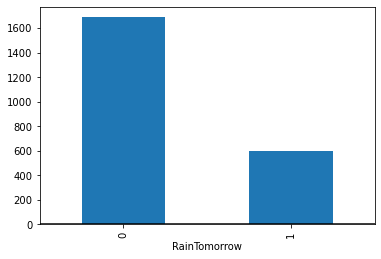

In [20]:
#Visualizing the difference in scale of wins between Blue (1) and Red (0) corners
groupby = weather_syd_d.groupby(['RainTomorrow'])
targetEDA=groupby['RainTomorrow'].aggregate(len)
print(targetEDA)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

We can see from this graph and matrix that the data is fairly skewed to NO RAIN, or 0. It appears that it only rains about 26% of the time in Sydney. In other terms, there is roughly a 26% chance that it will rain tomorrow. Using this frequency, we can determine that for our models to be predictively significant, they need to be at least 74% accurate. 

However, Accuracy wont be our main driver for model performance. Our relationhip of Recall and Precision will be the best measurement for these models since the RainTomorrow prediction only happens 26% of the time, we need to make sure we are hitting our best scores predicting our Yes variable. To make this simple, we can view the F1 score to see the weighted average of the two. The best F1 score we can achive is 1, and the worst is 0. Since both Precision and Recall are weighted equally in this score's calcualtion, it will give us the best overall performance metric. We will also pay attention, and not forget our overall accuracy of to help us find our optimal model, we need to make sure this stays above 74% at least.

Let's see what other kind of information we can find in our EDA.

### Correlation Analysis

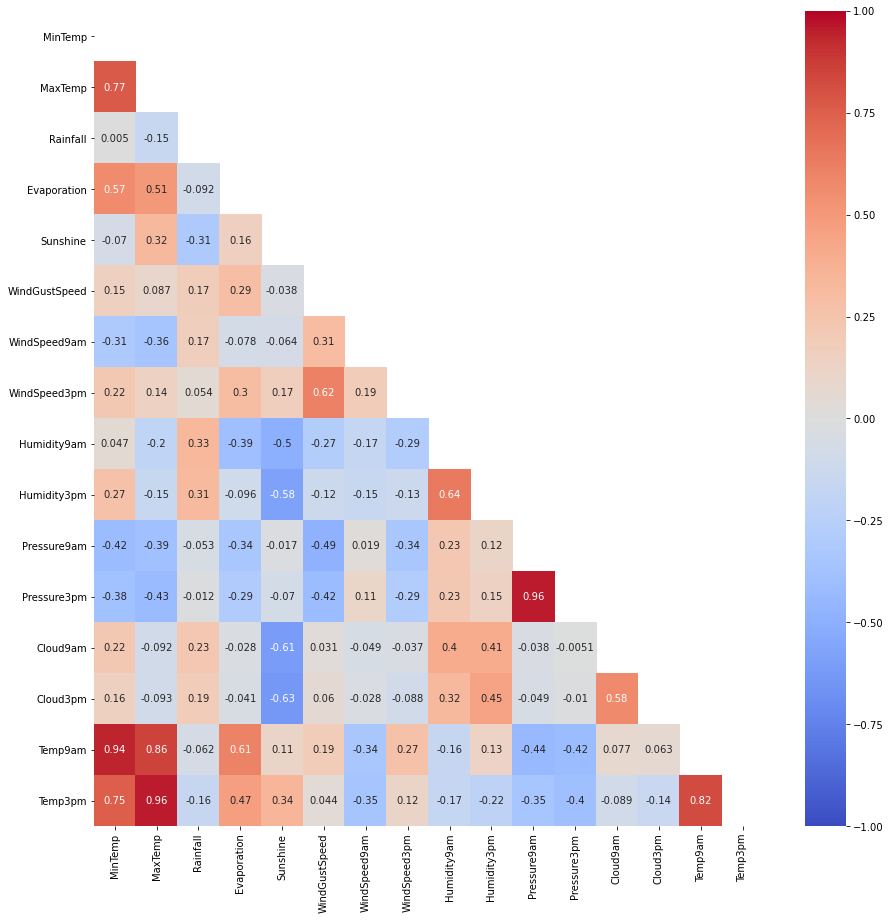

In [21]:
#Create correlation matrix
corr_matrix = weather_syd.iloc[:,1:].corr()
corr_matrix

import seaborn as sns

plt.figure(figsize=(15,15)) #need to adjust size as needed.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix,
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True,
           mask=mask)
plt.show()

We can see some correlation happening between a handfull of our variables. First, we can see that both Cloud9am and Cloud3pm are negatively correlated to Sunshine, which makes sense. If there is more sunshine, there would logically be less cloud coverage. We can also see that the temperatures and pressure from at 9am and 3pm are positively corelated. This also logically makes sense, unless we were to see a big change in those measurements at midday, they would stay relatively consistent, you would still see the gradual increase as the day warms up, but you would not likely see half the day cold and the other hot. Sydney has a mild climate and it stays relatively warm. Not often do they see large changes throughout the day. (This isn't Kansas City!!)

At this stage, seeing how our variables are correlated, we should be able to reduce our feature space a bit, cutting out some of the variables that follow eachother. We will plan to remove Temp9am, Pressure9am, MinTemp, and Cloud9am. I am choosing to eliminate the 9am variables to keep them consistent, noting that the weather later in the day being closer to the following prediction day.

In [22]:
weather_syd_d.drop(columns=['Temp9am', 'Pressure9am', 'MinTemp', 'Cloud9am'], inplace=True)

In [23]:
weather_syd_d.head()

,RainTomorrow,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
31156,0,19.5,0.0,4.6,9.5,35.0,4.0,19.0,73.0,56.0,...,0,0,0,0,0,0,0,0,0,0
31159,0,21.1,1.2,6.2,6.6,56.0,26.0,20.0,62.0,55.0,...,0,0,0,0,0,0,0,0,0,1
31160,0,21.8,1.0,6.0,5.9,50.0,13.0,28.0,82.0,58.0,...,0,0,0,0,0,0,0,0,0,0
31161,1,23.9,0.4,7.0,2.8,39.0,7.0,19.0,81.0,64.0,...,0,0,0,0,0,0,0,0,0,0
31162,0,28.9,2.0,4.0,10.8,41.0,22.0,17.0,63.0,48.0,...,0,0,0,0,0,0,0,0,0,1


I would like to explore some of the predictive variables in relation to our target variable. I would like to see how Sunshine, Evaporation, Humidity, and Pressure all relate to our chances of Rain Tomorrow. I will perform a series of plots to see this relationship.

### Sunshine vs. Rain Tomorrow

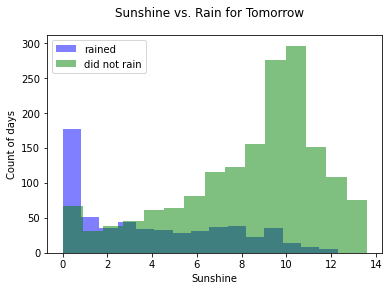

In [24]:
#Code credit to - https://medium.com/analytics-vidhya/tutorial-exploratory-data-analysis-eda-with-categorical-variables-6a569a3aea55

#Create histogram comparing RainTomorrow to Sunshine

fig, ax = plt.subplots()

ax.hist(weather_syd[weather_syd["RainTomorrow"]==1]["Sunshine"], bins=15, alpha=0.5, color="blue", label="rained")
ax.hist(weather_syd[weather_syd["RainTomorrow"]==0]["Sunshine"], bins=15, alpha=0.5, color="green", label="did not rain")

ax.set_xlabel("Sunshine")
ax.set_ylabel("Count of days")

fig.suptitle("Sunshine vs. Rain for Tomorrow")

ax.legend();

We can clearly see if the day had significant sunshine, then it did not end up raining the following day. This is what I was expecting to see. It appears that rain in these areas possibly require some buildup through the previous day to result in significant enought precipitation.

Next, I would like to see how Evaporation has an effect.

### Evaporation vs. Rain Tomorrow

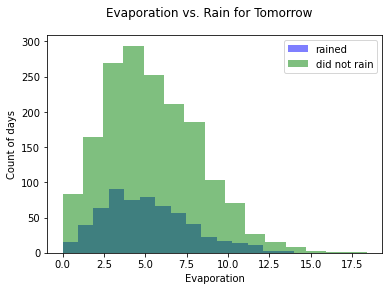

In [25]:
#Create histogram comparing RainTomorrow to Evaporation

fig, ax = plt.subplots()

ax.hist(weather_syd[weather_syd["RainTomorrow"]==1]["Evaporation"], bins=15, alpha=0.5, color="blue", label="rained")
ax.hist(weather_syd[weather_syd["RainTomorrow"]==0]["Evaporation"], bins=15, alpha=0.5, color="green", label="did not rain")

ax.set_xlabel("Evaporation")
ax.set_ylabel("Count of days")

fig.suptitle("Evaporation vs. Rain for Tomorrow")

ax.legend();

This is interesting. I assumed that a day with high evaporation would result in a greater count of rainy days. With the atmosphere collecting more liquid, I assumed we would see a release more offten the follwoing day. Instead what we find is that they are roughly the same. The difference in values we see here is in line with the target distribution.

Next, let's see how Humidity factors in. I will use Humidity readings from 3pm, since it is closest in time to the following day, i.e. our prediction.

### Humidity vs. Rain Tomorrow

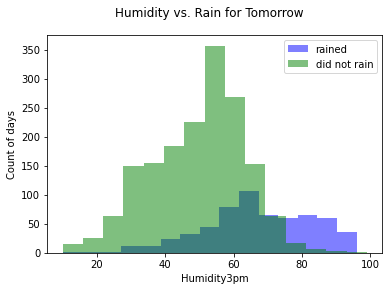

In [26]:
#Create histogram comparing RainTomorrow to Humidity3pm

fig, ax = plt.subplots()

ax.hist(weather_syd[weather_syd["RainTomorrow"]==1]["Humidity3pm"], bins=15, alpha=0.5, color="blue", label="rained")
ax.hist(weather_syd[weather_syd["RainTomorrow"]==0]["Humidity3pm"], bins=15, alpha=0.5, color="green", label="did not rain")

ax.set_xlabel("Humidity3pm")
ax.set_ylabel("Count of days")

fig.suptitle("Humidity vs. Rain for Tomorrow")

ax.legend();

This spread is more in line with my expectations. A higer humidity level late in the day does tend to create an increase in rainy days to follow. This shows that the atmosphere is relatively 'charged' up and ready to release water the following day.

Let's check and see how Pressure relates, I will continue the trend of 3pm.

### Pressure vs. Rain Tomorrow

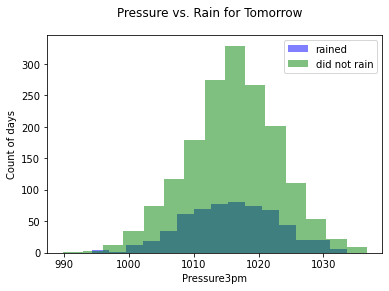

In [27]:
#Create histogram comparing RainTomorrow to Pressure3pm

fig, ax = plt.subplots()

ax.hist(weather_syd[weather_syd["RainTomorrow"]==1]["Pressure3pm"], bins=15, alpha=0.5, color="blue", label="rained")
ax.hist(weather_syd[weather_syd["RainTomorrow"]==0]["Pressure3pm"], bins=15, alpha=0.5, color="green", label="did not rain")

ax.set_xlabel("Pressure3pm")
ax.set_ylabel("Count of days")

fig.suptitle("Pressure vs. Rain for Tomorrow")

ax.legend();

This is interesting. It appears that Pressure skews slightly to the right, meaning that it may have a little impact, just not as much as I expected to see.

One last comparison I would like to make is between RainToday and RainTomorrow. Are we going to typically see rain carry over into a second day? Or are they more isolated daily incidents?

### Rain Today vs. Rain Tomorrow

In [28]:
#Create Crosstab of Rain Tomorrow vs Rain Today

rain_cross=pd.crosstab(weather_syd_d.RainTomorrow, weather_syd_d.RainToday_Yes, colnames=['Rain Today'],rownames=['Rain Tomorrow'])
print(rain_cross)

Rain Today        0    1
Rain Tomorrow           
0              1394  295
1               293  303


Text(0.5, 1.0, 'Rain Tomorrow vs. Rain Today')

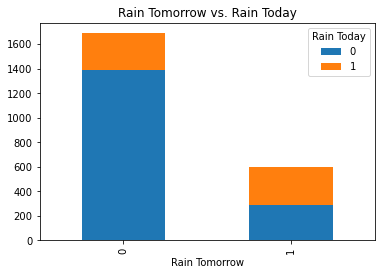

In [29]:
#Create stacked bar chart to visualize crosstab

rain_cross.plot(kind='bar', stacked=True)
plt.title('Rain Tomorrow vs. Rain Today')

We can see that rain today does seem to have somewhat of an impact. Of all our recorded days with rain, the following day recorded rain around 50% of the time. This tells us that when there is rain one day, there would be a roughly 50/50 chance that we will see rain the following day.

Through this EDA we can see that some of these variables, Sunshine and Humidity do have a positive impact to our chances of rain the following day. We can see that surprisingly, Evaporation has a slightly negative effect on our rain tomorrow chances. We have also learned that due to the neutral, almost normal distribution of effect that pressure has on our rain chances, it is not that impactful to the overall model.

# Predictive Classification Models

### Create Training and Test Sets

In [30]:
#Create a 70/30 split for our Training and Test sets.

from sklearn.model_selection  import train_test_split
features_train, features_test, target_train, target_test = train_test_split(
    weather_syd_d.iloc[:,1:].values, weather_syd_d.iloc[:,0].values, test_size=0.30, random_state=0)

print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(1599, 58)
(1599,)
(686, 58)
(686,)


### K-Nearest Neighbor (KNN)

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
clf_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))

#Train
clf_knn = clf_knn.fit(features_train, target_train)

#Validate
target_predicted_knn = clf_knn.predict(features_test)

#extracting true_positives, false_positives, true_negatives, false_negatives
target_names = ["RainTomorrow = No", "RainTomorrow = yes"]
print(classification_report(target_test, target_predicted_knn, target_names=target_names))
print(confusion_matrix(target_test, target_predicted_knn))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_knn).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
print('\n')
print("Accuracy Score", accuracy_score(target_test, target_predicted_knn))
print("Precision Score", precision_score(target_test, target_predicted_knn))
print("Recall Score", recall_score(target_test, target_predicted_knn))
print("F1 Score", f1_score(target_test, target_predicted_knn))

                    precision    recall  f1-score   support

 RainTomorrow = No       0.81      0.90      0.85       509
RainTomorrow = yes       0.58      0.39      0.47       177

          accuracy                           0.77       686
         macro avg       0.69      0.65      0.66       686
      weighted avg       0.75      0.77      0.75       686

[[459  50]
 [108  69]]
True Negatives:  459
False Positives:  50
False Negatives:  108
True Positives:  69


Accuracy Score 0.7696793002915452
Precision Score 0.5798319327731093
Recall Score 0.3898305084745763
F1 Score 0.4662162162162163


In [43]:
#Verify results with cross validation, 10 fold
scores = cross_val_score(clf_knn, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean() 

Cross Validation Score for each K [0.7625     0.79375    0.75       0.81875    0.76875    0.73125
 0.7875     0.8125     0.7875     0.78616352]


0.7798663522012579

#### Results:
For this model we tuned the number of neighbors. We performed tested the number of neighbors comparing n=3, n=5, and n=10. The best results came with n=3. The results between these three were somewhat of a balancing act. With n=10 we saw the highest accuracy and precision, yet with the lowest recall. n=3 saw our highest recall, yet the lowest precision. The accuracy between 3 and 5 remained mostly unchanged, but we saw the best ballance on n=3 with the F1 score at its highest of 0.47, with accuracy of 77%, Precision of 58% and Recall of 39%. Overall this is not a well performing model, and probably would not be of much help. Our best performing tune is only predicting 39% of the rainy days, and is only 58% precise when doing so.

Let's see if we can improve.

### Decision Tree

In [97]:
#Build the Decision Tree
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier(random_state=123, max_depth = 5)
#print(clf_dt)

#Train
clf_dt = clf_dt.fit(features_train, target_train)

#Validate
target_predicted_dt = clf_dt.predict(features_test)

#extracting true_positives, false_positives, true_negatives, false_negatives
target_names = ["RainTomorrow = No", "RainTomorrow = Yes"]
print(classification_report(target_test, target_predicted_dt, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_dt).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
print('\n')
print("Accuracy Score", accuracy_score(target_test, target_predicted_dt))
print("Precision Score", precision_score(target_test, target_predicted_dt))
print("Recall Score", recall_score(target_test, target_predicted_dt))
print("F1 Score", f1_score(target_test, target_predicted_dt))

                    precision    recall  f1-score   support

 RainTomorrow = No       0.85      0.90      0.88       509
RainTomorrow = Yes       0.66      0.54      0.59       177

          accuracy                           0.81       686
         macro avg       0.75      0.72      0.73       686
      weighted avg       0.80      0.81      0.80       686

True Negatives:  460
False Positives:  49
False Negatives:  82
True Positives:  95


Accuracy Score 0.8090379008746356
Precision Score 0.6597222222222222
Recall Score 0.536723163841808
F1 Score 0.5919003115264797


In [34]:
#Verify results with cross validation, 10 fold
scores = cross_val_score(clf_dt, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean() 

Cross Validation Score for each K [0.7625     0.8375     0.80625    0.81875    0.80625    0.81875
 0.85625    0.80625    0.8375     0.79874214]


0.8148742138364782

#### Results
The decision tree model was tuned using the max_depth parameter. We want to see if a more complex or simple tree helps with this prediction. Typically we can expect to see better performance with a simpler tree, not letting it grow too far. I started with it as 'None', then tuned to 10, then 5. The best results so far have come from our pruned tree with a max_depth = 5. This is in line with our expectations. 

Our model performs at its best when its pruned the smallest. We can see that our accuracy has risen to 80% confirmed by our cross validation. We can also see that our recall has also increased over our KNN model, now at 54%. Our model is casting a wider net, and still maintaining somewhat steady precision, at 66%. Overall this model improved over the KNN model. Our F1 score is at 0.59. We are heading in the right direction, but I dont think we are there yet.

### Random Forest

In [98]:
#Build Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_features=45, n_estimators=100, random_state=123)

#Train
clf_rf.fit(features_train, target_train)

#Validate
target_predicted_rf = clf_rf.predict(features_test)

#extracting true_positives, false_positives, true_negatives, false_negatives
target_names = ["RainTomorrow = No", "RainTomorrow = Yes"]
print(classification_report(target_test, target_predicted_rf, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_rf).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
print('\n')
print("Accuracy Score", accuracy_score(target_test, target_predicted_rf))
print("Precision Score", precision_score(target_test, target_predicted_rf))
print("Recall Score", recall_score(target_test, target_predicted_rf))
print("F1 Score", f1_score(target_test, target_predicted_rf))

                    precision    recall  f1-score   support

 RainTomorrow = No       0.86      0.93      0.89       509
RainTomorrow = Yes       0.73      0.57      0.64       177

          accuracy                           0.84       686
         macro avg       0.80      0.75      0.77       686
      weighted avg       0.83      0.84      0.83       686

True Negatives:  472
False Positives:  37
False Negatives:  76
True Positives:  101


Accuracy Score 0.8352769679300291
Precision Score 0.7318840579710145
Recall Score 0.5706214689265536
F1 Score 0.6412698412698412


In [78]:
#Verify results with cross validation, 10 fold
scores = cross_val_score(clf_rf, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean() 

Cross Validation Score for each K [0.80625    0.875      0.8375     0.8625     0.825      0.81875
 0.8375     0.825      0.86875    0.85534591]


0.8411595911949685

Let's see how we can tune this forest using a grid search!

In [83]:
# use a full grid over all parameters
from numpy import arange
import time
#param_grid = {"max_features": arange(0,50,5)} # FIRST TUNE
param_grid = {"max_features": arange(43,53,1)} # SECOND TUNE
start = time.time()

# run grid search
grid_search = GridSearchCV(clf_rf, param_grid=param_grid,n_jobs=-1, cv=10, scoring='f1')
grid_search.fit(features_train, target_train)
end = time.time()
print("Time to run", round(end-start), "seconds")
print(grid_search.cv_results_)
print(*"BEST SCORE", grid_search.best_score_)
print(*"BEST PARAM", grid_search.best_params_)

Time to run 18 seconds
{'mean_fit_time': array([1.24519391, 1.24000952, 1.26075549, 1.3005074 , 1.3145021 ,
       1.32779477, 1.35736125, 1.47126298, 1.41117349, 1.26183558]), 'std_fit_time': array([0.02583412, 0.01464771, 0.01921887, 0.01876567, 0.02072347,
       0.02344215, 0.02772272, 0.05854874, 0.02376562, 0.23738737]), 'mean_score_time': array([0.0242033 , 0.02489238, 0.02532911, 0.02440891, 0.02346733,
       0.02426541, 0.02527633, 0.024212  , 0.02470784, 0.02032633]), 'std_score_time': array([0.00124597, 0.00177239, 0.00300868, 0.00161085, 0.00084321,
       0.00215213, 0.00220231, 0.00094445, 0.003189  , 0.00421059]), 'param_max_features': masked_array(data=[43, 44, 45, 46, 47, 48, 49, 50, 51, 52],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_features': 43}, {'max_features': 44}, {'max_features': 45}, {'max_features': 46}, {'max_features': 47}, 

#### Results
For this model, I will tuned the max_features parameter. I performed the default, 45, and 50 features. I used a grid search method to help find the best number of features. I first performed a grid search of 0-50 by 5. This suggested my best number of feature being 45, the results improveed over default. I then ran the grid search again by 43-53 by 1. This resulted in a number of 50. This oddly got us a worse F1 score than with 45. We saw an increase in precision but a small dip in recall. This is where the F1 comes in most handy. We can see an averaged performance between these two metrics that seem to be negatively correlated.

The combined score shows us that 45 is our optimum feature count. We are now reaching an accuracy of 83% with Recall of 57% at 73% Precision. Our F1 score is now 0.64. Our predictive power is slowly getting better with each new model! Let's keep improving to see if any further methods are better.

### Support Vector Machines - Linear Kernel

In [99]:
#Build the Support Vector Machine
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf_linearSVC = make_pipeline(StandardScaler(), SVC(kernel='linear', C=0.45, class_weight='balanced', random_state=123))

#Train the model
clf_linearSVC.fit(features_train, target_train)

#Validate the model
target_predicted_linearSVC = clf_linearSVC.predict(features_test)

#extracting true_positives, false_positives, true_negatives, false_negatives
target_names = ["RainTomorrow = No", "RainTomorrow = Yes"]
print(classification_report(target_test, target_predicted_linearSVC, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_linearSVC).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
print('\n')
print("Accuracy Score", accuracy_score(target_test, target_predicted_linearSVC))
print("Precision Score", precision_score(target_test, target_predicted_linearSVC))
print("Recall Score", recall_score(target_test, target_predicted_linearSVC))
print("F1 Score", f1_score(target_test, target_predicted_linearSVC))

                    precision    recall  f1-score   support

 RainTomorrow = No       0.92      0.78      0.84       509
RainTomorrow = Yes       0.56      0.79      0.66       177

          accuracy                           0.79       686
         macro avg       0.74      0.79      0.75       686
      weighted avg       0.82      0.79      0.80       686

True Negatives:  399
False Positives:  110
False Negatives:  37
True Positives:  140


Accuracy Score 0.7857142857142857
Precision Score 0.56
Recall Score 0.7909604519774012
F1 Score 0.6557377049180328


In [98]:
#Verify results with cross validation, 10 fold
scores = cross_val_score(clf_linearSVC, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean() 

Cross Validation Score for each K [0.7125     0.8        0.8        0.75       0.78125    0.80625
 0.74375    0.7625     0.81875    0.76100629]


0.7736006289308175

In [89]:
### import time
start = time.time()

param_grid={"C": arange(0,1,0.05)}

clf_linearSVC = SVC(kernel='linear', class_weight='balanced', random_state=123)
grid_svm = GridSearchCV(clf_linearSVC, param_grid,n_jobs=-1, cv=5, scoring='f1')
grid_svm.fit(features_train, target_train)
print("SCORES", grid_svm.cv_results_)
print("BEST SCORE", grid_svm.best_score_)
print("BEST PARAM", grid_svm.best_params_)
end = time.time()
print("Time to run", round(end-start), "seconds")

SCORES {'mean_fit_time': array([4.20384407e-03, 3.54739285e-01, 5.70330572e-01, 7.94177818e-01,
       1.43658161e+00, 1.39192457e+00, 1.74909549e+00, 1.99317713e+00,
       2.19808888e+00, 2.25968642e+00, 2.86143370e+00, 2.89064703e+00,
       2.87138753e+00, 3.17955422e+00, 3.65846987e+00, 4.13356609e+00,
       3.86953316e+00, 4.37679176e+00, 3.57186570e+00, 2.90393667e+00]), 'std_fit_time': array([3.75082952e-04, 3.06147941e-02, 9.41001077e-02, 1.50842931e-01,
       3.78174887e-01, 2.42300084e-01, 6.99601653e-01, 5.56630417e-01,
       4.59029235e-01, 4.52992501e-01, 5.22837026e-01, 4.16425407e-01,
       2.18986742e-01, 8.25330112e-01, 8.60272740e-01, 6.53843411e-01,
       1.45870993e+00, 1.54534511e+00, 6.43396100e-01, 1.01703193e+00]), 'mean_score_time': array([0.        , 0.01876512, 0.01855931, 0.01699758, 0.01718845,
       0.01756229, 0.01778574, 0.01956263, 0.01865335, 0.01873021,
       0.01791902, 0.0202404 , 0.01815734, 0.01683903, 0.01598711,
       0.01622901, 0.0152

For this model, I tuned a couple of parameters. First, we ran the SVM in its default state, C=1.0 and running with class_weight = none. Next, I attempted to run the model with class_weight = balanced. This actually made the model better. For the 3rd model I ran a grid search to find our optimal C parameter, which was chosen to be 0.45. Comparing our C=1 and C=0.3 models, we see the exact same results. I decided that our C=0.45 model was the best all around model for the linear SVM allowing for a bit more variance to help the model become more robust with new data outside our training/test sets. The only problem here is that our cross validation results are somewhat wide, so we can see that our model is somewhat unstable.

Our recall is now at 79%, precision at 56% and accuracy at 78%. We have improved our F1 score to 0.65. Things are still improving! Let's check out some different kernal methods for SVM. 

### Support Vector Machine - Radial & RBF Kernal

In [100]:
#Build 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf_radialSVC = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=123))

#Train
clf_radialSVC.fit(features_train, target_train)

#Validate
target_predicted_radialSVC = clf_radialSVC.predict(features_test)

#extracting true_positives, false_positives, true_negatives, false_negatives
target_names = ["RainTomorrow = No", "RainTomorrow = Yes"]
print(classification_report(target_test, target_predicted_radialSVC, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_radialSVC).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
print('\n')
print("Accuracy Score", accuracy_score(target_test, target_predicted_radialSVC))
print("Precision Score", precision_score(target_test, target_predicted_radialSVC))
print("Recall Score", recall_score(target_test, target_predicted_radialSVC))
print("F1 Score", f1_score(target_test, target_predicted_radialSVC))

                    precision    recall  f1-score   support

 RainTomorrow = No       0.86      0.92      0.89       509
RainTomorrow = Yes       0.72      0.58      0.64       177

          accuracy                           0.83       686
         macro avg       0.79      0.75      0.77       686
      weighted avg       0.83      0.83      0.83       686

True Negatives:  470
False Positives:  39
False Negatives:  75
True Positives:  102


Accuracy Score 0.8338192419825073
Precision Score 0.723404255319149
Recall Score 0.576271186440678
F1 Score 0.6415094339622641


In [105]:
#Verify results with cross validation, 10 fold
scores = cross_val_score(clf_radialSVC, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean() 

Cross Validation Score for each K [0.7875     0.85625    0.83125    0.85625    0.79375    0.83125
 0.8125     0.84375    0.875      0.85534591]


0.8342845911949686

In [102]:
#code chunk is from Raschka & Mirjalili (2019). Python Machine Learning. 3rd ed. p. 207.

start=time.time()
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=123))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='f1', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(features_train, target_train)
print(gs.best_score_)
print(gs.best_params_)
end=time.time()
print("Time to run", round(start-end), "seconds")

0.6390443145291766
{'svc__C': 1000.0, 'svc__gamma': 0.0001, 'svc__kernel': 'rbf'}
Time to run -24 seconds


For this model, we will focus on the C and gamma parameters. For the first run I set them as default. Next, I used a grid search function from the textbook to tune these values for the two parameter simultaneously. The results show us that the best model is still RBF, with a C=1000 and gamma=0.0001. Applying those parameters to the model we can see that our recall did improve, but at the overall sacrifice of our precision and accuracy. The default model is running better than this grid search suggested tune. With the default settings our model is 83% accurate, with recall of 58% and precision of 72%. The F1 score is 0.64. So far this linear version of SVM is performing well, but not as good as the linear kernal.

Overall, we are still getting our best results from the Grid Tuned SVM With a Linear Kernel. Let's see if we can do better!

### Stochastic Gradient Descent

In [101]:
#Build
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier

#Use pipeline to scale the data first
scaler = StandardScaler
clf_sgd_logit = make_pipeline(StandardScaler(), SGDClassifier(loss='hinge', random_state=123))

#Train
clf_sgd_logit.fit(features_train, target_train)

#Validate
target_predicted_sgd_logit = clf_sgd_logit.predict(features_test)

#extracting true_positives, false_positives, true_negatives, false_negatives
target_names = ["RainTomorrow = No", "RainTomorrow = Yes"]
print(classification_report(target_test, target_predicted_sgd_logit, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_sgd_logit).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
print('\n')
print("Accuracy Score", accuracy_score(target_test, target_predicted_sgd_logit))
print("Precision Score", precision_score(target_test, target_predicted_sgd_logit))
print("Recall Score", recall_score(target_test, target_predicted_sgd_logit))
print("F1 Score", f1_score(target_test, target_predicted_sgd_logit))

                    precision    recall  f1-score   support

 RainTomorrow = No       0.88      0.84      0.86       509
RainTomorrow = Yes       0.59      0.66      0.62       177

          accuracy                           0.79       686
         macro avg       0.73      0.75      0.74       686
      weighted avg       0.80      0.79      0.80       686

True Negatives:  428
False Positives:  81
False Negatives:  61
True Positives:  116


Accuracy Score 0.793002915451895
Precision Score 0.5888324873096447
Recall Score 0.655367231638418
F1 Score 0.6203208556149733


According to the documentation, SGD is best suited for large, space datasets, and in many occasions, text dominant. Seeing as this dataset is neither of those, it makes sense that we did not perform as well with this model as we have with previous models.

For this model I tuned the loss function, trying out hinge, log, and modified_huber. The hinge loss function provided us our best scores of the three. Overall accuracy was highest at 79%, precision was in the middle of the three at 59%, recall was the highest at 66%, and with that we got our highest F1 score of 0.62. Still lower than our SVC Linear model. Let's move on!

### Adaboost

In [102]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
clf_dt_ab = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), algorithm="SAMME", learning_rate = 0.1, n_estimators=30, random_state=123)

#Train
clf_dt_ab.fit(features_train, target_train)

#Validate
target_predicted_dt_ab=clf_dt_ab.predict(features_test)

#extracting true_positives, false_positives, true_negatives, false_negatives
target_names = ["RainTomorrow = No", "RainTomorrow = Yes"]
print(classification_report(target_test, target_predicted_dt_ab, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_dt_ab).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
print('\n')
print("Accuracy Score", accuracy_score(target_test, target_predicted_dt_ab))
print("Precision Score", precision_score(target_test, target_predicted_dt_ab))
print("Recall Score", recall_score(target_test, target_predicted_dt_ab))
print("F1 Score", f1_score(target_test, target_predicted_dt_ab))

                    precision    recall  f1-score   support

 RainTomorrow = No       0.87      0.93      0.90       509
RainTomorrow = Yes       0.75      0.58      0.66       177

          accuracy                           0.84       686
         macro avg       0.81      0.76      0.78       686
      weighted avg       0.84      0.84      0.84       686

True Negatives:  475
False Positives:  34
False Negatives:  74
True Positives:  103


Accuracy Score 0.8425655976676385
Precision Score 0.7518248175182481
Recall Score 0.5819209039548022
F1 Score 0.6560509554140127


For this model, I tuned a couple of parameters. All of these have a base learner of Decision Tree, and since our best decision tree earler had the max depth of 5, that is the setting I used across all 3 models. The first model I used the SAMME.R algorithm. Next I used the SAMME algorithm and saw some slight improvements. From there I tuned the learning_rate = 0.1 and the n_estimators = 30. I wanted to try this out because I felt that simplifying the model a bit with less estimators may have helped its performance. 

I was right! We reached our best results with this setup. We are now seeing an accuracy of 84%, a precision of 75% and a recall of 58%. Our F1 score is now tied for best of all models at 0.66. This model is now tied for performance with our SVC Linear model. However, we are achiving a higher overall accuracy with this Adaboost model. Let's see if we can do any better.

### Bagging Classifier

In [103]:
#Build
from sklearn.ensemble import BaggingClassifier
clf_bag = BaggingClassifier(n_estimators=10, random_state=123)

#Train
clf_bag.fit(features_train, target_train)

#Validate 
target_predicted_clf_bag=clf_bag.predict(features_test)

#extracting true_positives, false_positives, true_negatives, false_negatives
target_names = ["RainTomorrow = No", "RainTomorrow = Yes"]
print(classification_report(target_test, target_predicted_clf_bag, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_clf_bag).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
print('\n')
print("Accuracy Score", accuracy_score(target_test, target_predicted_clf_bag))
print("Precision Score", precision_score(target_test, target_predicted_clf_bag))
print("Recall Score", recall_score(target_test, target_predicted_clf_bag))
print("F1 Score", f1_score(target_test, target_predicted_clf_bag))

                    precision    recall  f1-score   support

 RainTomorrow = No       0.86      0.94      0.89       509
RainTomorrow = Yes       0.75      0.55      0.63       177

          accuracy                           0.84       686
         macro avg       0.80      0.74      0.76       686
      weighted avg       0.83      0.84      0.83       686

True Negatives:  476
False Positives:  33
False Negatives:  80
True Positives:  97


Accuracy Score 0.8352769679300291
Precision Score 0.7461538461538462
Recall Score 0.5480225988700564
F1 Score 0.6319218241042345


This is a well performing model. It behaves in a more deliberate manner than some of the other models, meaning overall we have lower recall and higher precision. We see this model cast a smaller net, but focus more on making the correct predictions. 

For this model I tuned the n_estimators. I attemped 100, 30, and 10. Each step lower created better results. I chose to try 30 to compare it to the Adaboost model, which performed best with 30. However, it performed overall worse. Our best bagging model came with 10 base estimators. With only 10 estimators we saw an accuracy of 84%, precision of 75% and recall of 55%. Our F1 score came out to be 0.63. This model is currently sitting around 4th place overall, so it's good but not great in comparison. Let's see what else we can try.

### Gradient Boosting

In [104]:
#Build 
from sklearn.ensemble import GradientBoostingClassifier
clf_GBC = GradientBoostingClassifier(n_estimators=30, learning_rate=0.3, random_state=123) #default learning rate is 0.1

#Train
clf_GBC.fit(features_train, target_train)

#Validate
target_predicted_GBC=clf_GBC.predict(features_test)

#extracting true_positives, false_positives, true_negatives, false_negatives
target_names = ["RainTomorrow = No", "RainTomorrow = Yes"]
print(classification_report(target_test, target_predicted_GBC, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_GBC).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
print('\n')
print("Accuracy Score", accuracy_score(target_test, target_predicted_GBC))
print("Precision Score", precision_score(target_test, target_predicted_GBC))
print("Recall Score", recall_score(target_test, target_predicted_GBC))
print("F1 Score", f1_score(target_test, target_predicted_GBC))

                    precision    recall  f1-score   support

 RainTomorrow = No       0.87      0.92      0.89       509
RainTomorrow = Yes       0.72      0.60      0.66       177

          accuracy                           0.84       686
         macro avg       0.79      0.76      0.77       686
      weighted avg       0.83      0.84      0.83       686

True Negatives:  467
False Positives:  42
False Negatives:  70
True Positives:  107


Accuracy Score 0.8367346938775511
Precision Score 0.7181208053691275
Recall Score 0.6045197740112994
F1 Score 0.6564417177914109


I think we have a new front runner! I built 3 models, the first with a learning_rate = 0.1, next with n_estimators = 30 and learning_rate = 0.1, and finally with n_estimators = 30 and learning_rate = 0.3. 

This final model (30, 0.3) gave us the best results so far! We are now looking at an accuracy of 84%, a precision of 72% and a recall of 60%. Our F1 score is at 0.66 as we've seen before, but the levels of our precision/recall are at their best relationship so far. We have been able to boost them both up without sacrificing one over the other too much. This is great! I wonder if we can still do any better...

### Extra Trees

In [105]:
#Build
from sklearn.ensemble import ExtraTreesClassifier
clf_xdt = ExtraTreesClassifier(n_estimators= 100, n_jobs=-1, random_state=123, class_weight = 'balanced', 
                               max_features = 30)

#Train
clf_xdt.fit(features_train, target_train)

#Validate
target_predicted_xdt=clf_xdt.predict(features_test)

#extracting true_positives, false_positives, true_negatives, false_negatives
target_names = ["RainTomorrow = No", "RainTomorrow = Yes"]
print(classification_report(target_test, target_predicted_xdt, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_xdt).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
print('\n')
print("Accuracy Score", accuracy_score(target_test, target_predicted_xdt))
print("Precision Score", precision_score(target_test, target_predicted_xdt))
print("Recall Score", recall_score(target_test, target_predicted_xdt))
print("F1 Score", f1_score(target_test, target_predicted_xdt))

                    precision    recall  f1-score   support

 RainTomorrow = No       0.85      0.90      0.88       509
RainTomorrow = Yes       0.67      0.55      0.60       177

          accuracy                           0.81       686
         macro avg       0.76      0.73      0.74       686
      weighted avg       0.81      0.81      0.81       686

True Negatives:  460
False Positives:  49
False Negatives:  79
True Positives:  98


Accuracy Score 0.8134110787172012
Precision Score 0.6666666666666666
Recall Score 0.5536723163841808
F1 Score 0.6049382716049383


This model is not on of our best. I tuned the max_features, using 'auto', 'log2', and 30. I went with 30 for the third tune becuase it seems to be where a lot of these models peak in performance when simplifying the amount of features used to create its predictions. We are a little ways off from our new top model. 

With max_features = 30, we are seeing an accuracy of 81%, precision of 67%, recall of 55% and an overall F1 score of 0.60, about 5pts off the lead. Let's keep moving and see if these last few models can beat Gradient Boosting!

### Artificial Neural Networks (ANN)

In [106]:
#Build
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler = StandardScaler
#clf_nn = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(5),random_state=123, max_iter=1000))
#clf_nn = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(5), solver="lbfgs",random_state=123, max_iter=1000))
clf_nn = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(5), solver="sgd", learning_rate="adaptive", max_iter=1000, random_state=123))
#clf_nn = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(5,5), solver="sgd", learning_rate="adaptive", max_iter=1000,random_state=123))
#clf_nn = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(15,15), solver="sgd", learning_rate="adaptive", max_iter=10000,random_state=123))

#Train
clf_nn.fit(features_train, target_train)

#Validate
target_predicted_clf_nn = clf_nn.predict(features_test)


#extracting true_positives, false_positives, true_negatives, false_negatives
target_names = ["RainTomorrow = No", "RainTomorrow = Yes"]
print(classification_report(target_test, target_predicted_clf_nn, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted_clf_nn).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
print('\n')
print("Accuracy Score", accuracy_score(target_test, target_predicted_clf_nn))
print("Precision Score", precision_score(target_test, target_predicted_clf_nn))
print("Recall Score", recall_score(target_test, target_predicted_clf_nn))
print("F1 Score", f1_score(target_test, target_predicted_clf_nn))

                    precision    recall  f1-score   support

 RainTomorrow = No       0.88      0.90      0.89       509
RainTomorrow = Yes       0.69      0.63      0.66       177

          accuracy                           0.83       686
         macro avg       0.78      0.77      0.77       686
      weighted avg       0.83      0.83      0.83       686

True Negatives:  459
False Positives:  50
False Negatives:  65
True Positives:  112


Accuracy Score 0.8323615160349854
Precision Score 0.691358024691358
Recall Score 0.632768361581921
F1 Score 0.6607669616519175


-Tuned models are commented out above-

It looks like we have a new leader! So for this model, I tuned a couple different parameters. First I wanted to try and see which solver for the weight optimization worked the best. We tried adam, lbfgs, and sgd. The best solver was sdg. From there I began to play with the layer and node layout. Sticking with 1 (layer) x 5 (nodes), I expanded that to 2 x 5, and then 2 x 15. I saw a decline in performance by just simply adding another layer, but by adding more nodes it slighly improved, however it never beat our original 1 x 5 structure. (Note: I did expand max iterations to overcome convergance issues as needed, 1000 was a good baseline for most tunes).

So, with the sgd solver and a 1 x 5 layer/node strucutre, we got our best results over all other models so far! We have now reached an accuracy of 83%, precision of 69%, recall of 63% and an F1 score of 0.66!

Next, let's try and see if we can stack some of our best learners to try and make one super-learner!

### Stacking

In [94]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#Stacking four base learners: ANN, Gradient Boosting, AdaBoost, SVC Linear Kernel

learner_1 = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(5), solver="sgd", learning_rate="adaptive", max_iter=1000, random_state=123))
learner_2 = GradientBoostingClassifier(n_estimators=30, learning_rate=0.3, random_state=123)
learner_3 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), algorithm="SAMME", learning_rate = 0.1, n_estimators=30, random_state=123)
learner_4 = make_pipeline(StandardScaler(), SVC(kernel='linear', C=0.45, class_weight='balanced', random_state=123))

stacked_learner = VotingClassifier(estimators=[('nn', learner_1), ('gb', learner_2), ('ab', learner_3), ('svc', learner_4)], voting='hard')

for MV, label in zip([learner_1, learner_2, learner_3, learner_4, stacked_learner], 
                     ['ANN', 'Gradient Boosting', 'AdaBoost', 'SVC Linear Kernel', 'Second Stage Learner']):
    scores2 = cross_val_score(MV, features_train, target_train, cv=5, scoring='recall')
    scores3 = cross_val_score(MV, features_train, target_train, cv=5, scoring='accuracy')
    scores4 = cross_val_score(MV, features_train, target_train, cv=5, scoring='precision')
    scores5 = cross_val_score(MV, features_train, target_train, cv=5, scoring='f1')
    
    print("Recall: %0.2f (+/- %0.2f) [%s]" % (scores2.mean(), scores2.std(), label))
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores3.mean(), scores3.std(), label))
    print("Precision: %0.2f (+/- %0.2f) [%s]" % (scores4.mean(), scores4.std(), label))
    print("F1 Score: %0.2f (+/- %0.2f) [%s]" % (scores5.mean(), scores5.std(), label))

Recall: 0.59 (+/- 0.05) [ANN]
Accuracy: 0.84 (+/- 0.02) [ANN]
Precision: 0.74 (+/- 0.05) [ANN]
F1 Score: 0.66 (+/- 0.04) [ANN]
Recall: 0.57 (+/- 0.04) [Gradient Boosting]
Accuracy: 0.83 (+/- 0.01) [Gradient Boosting]
Precision: 0.71 (+/- 0.04) [Gradient Boosting]
F1 Score: 0.63 (+/- 0.02) [Gradient Boosting]
Recall: 0.53 (+/- 0.05) [AdaBoost]
Accuracy: 0.83 (+/- 0.02) [AdaBoost]
Precision: 0.75 (+/- 0.07) [AdaBoost]
F1 Score: 0.62 (+/- 0.05) [AdaBoost]
Recall: 0.73 (+/- 0.04) [SVC Linear Kernel]
Accuracy: 0.77 (+/- 0.02) [SVC Linear Kernel]
Precision: 0.55 (+/- 0.03) [SVC Linear Kernel]
F1 Score: 0.63 (+/- 0.03) [SVC Linear Kernel]
Recall: 0.56 (+/- 0.05) [Second Stage Learner]
Accuracy: 0.84 (+/- 0.02) [Second Stage Learner]
Precision: 0.76 (+/- 0.05) [Second Stage Learner]
F1 Score: 0.64 (+/- 0.04) [Second Stage Learner]


For this stacking model, I stacked the top 4 performing models so far in this notebook. I stacked ANN, Gradient Boosting, AdaBoost, and SVC Linear Kernal. I used thier top performing tunes and input them into the stacked learner. Overall this appears to have performed a little worse than our top performing model, which is currently still the ANN. Our ANN is pulling an F1 score of 0.66, while when we stack, we are seeing a F1 score of 0.64. This was a surprise! I was actually hoping to see some sort of super model being able to use the best of our bunch to really nail the predictions, but that is why we test!

# Results!

Let's take a look at all of our models and see how we did!

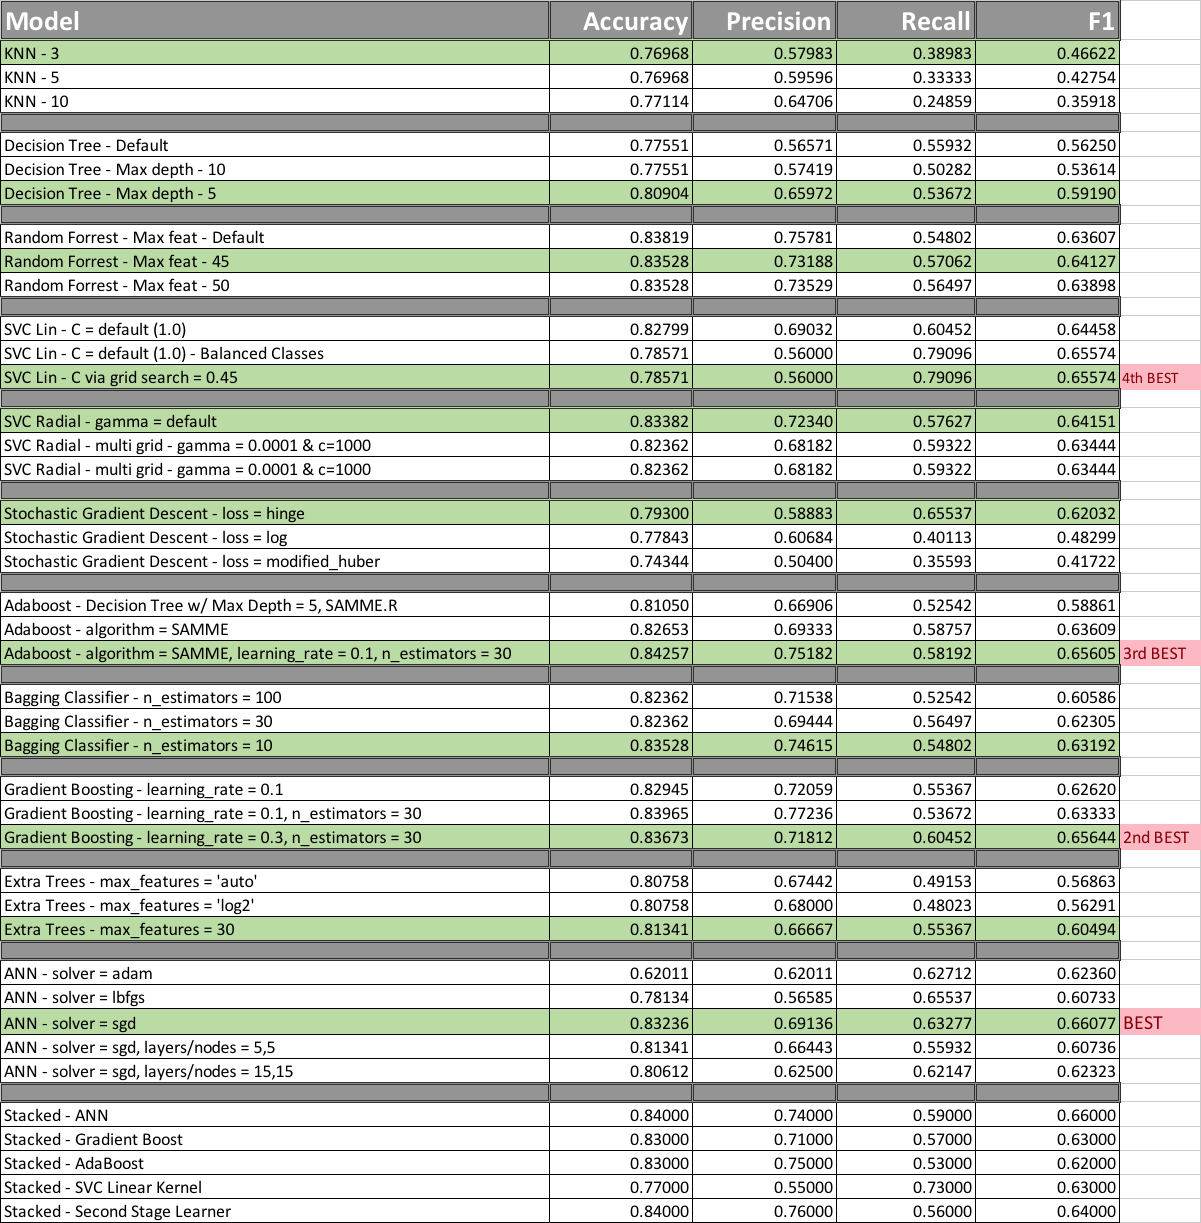

That is a lot of results! Let's dive in a bit. If we recall our original dataset, of all our observations, we only saw RainTommorrow = Yes about 26% of the time. Therefore we needed our models to at least be 74% accurate. Luckily that does not seem to be a problem because many of our models were well above that threshold. However, I don't believe that accuracy should be our main driver to determine the best performing model on this dataset. We need to be able to find that sweet spot between our recall and precision to help out model predict as many rainy days as it can, as precisely as it can. Since the F1 score is a weighted average between the recall and precision performance, it should lead us to the best performing model that doesn’t lean to far on either metric. Meaning, we don’t want a model that just casts a huge net and has very little precision, or focuses too much on precision, but only really captures a small amount of the rain events. The F1 score is a number between 0-1, with 0 being no predictive power, and 1 being perfect recall and precision.

With that understanding we can then find our best performing model based on our F1 score! Looks like we are doing our best predicting overall with the Artificial Neural Network, running the Stochastic Gradient Descent solver for weight optimization. With this model we used one layer, with 5 nodes. We reached our highest level of F1 score of 0.66. Depending on the needs of the organization that may employ this model, that may or may not be enough. We are hitting an accuracy of 83% but since we have such a heavy weight towards the RainTomorrow = No, that isn’t too hard of a number to predict. At random you'd predict correctly that it won’t rain a majority of the time. This model was casting a decent size net, collecting 63% of the rainy days, and doing it with somewhat average precision, around 69%. I think for this model to be usable, it may need to perform better. At this rate, our model's really topped the charts at being able to predict a rainy day <70% of the time. Another downside to this result, is that the ANN model, working as a black box, isn't really capable of telling us much about what factors really drive these results. We may be able to interpret some weights, but we really won’t be able to see good coefficients to draw more inferential detail from.

Is this enough? That depends on the application. For your local weather reports, making sure the average person dresses appropriately? That might be helpful, but for potentially critical predictions, such as transit or constructiosn, this may not quite cut it. However we are cutting the uncertanty of rainy days by over 60%, so that has to count for something! Overall I found this experiment really interesting, and I would like to one day test this out on different areas around Australia. It's possible that one of these models could be really powerful in predicting the weather of Perth, for example!